In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

# Monty Hall Problem

The Monty Hall Problem is a probability puzzle based on the American television game show 'Let's Make a Deal' and named after the host Monty Hall. The problem became famous mostly because of a question from a reader to the Parade magazine in the 'Ask Marilyn' column.

The Description of the Problem:
***
Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?"

***

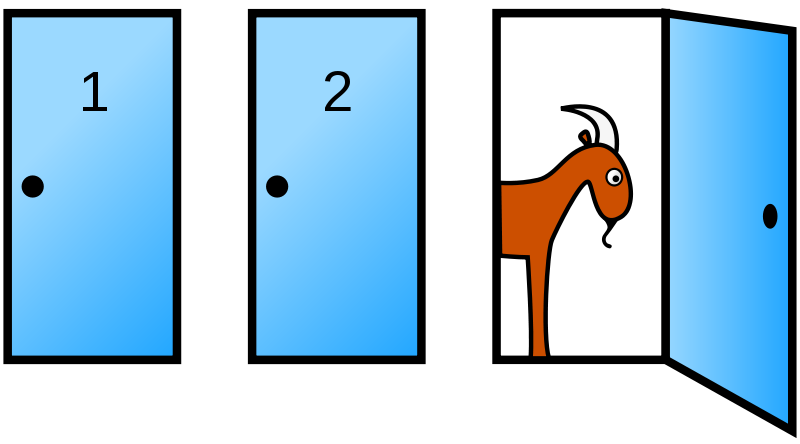

In [2]:
#First Step
##Starting the Doors and the Prize
Doors = [1,2,3]
Prize = random.choice(Doors)

#Second Step
##Player's First Choice
Choice = int(input('There are Three Doors 1,2 and 3. Choose between one of then:'))
print('\n')

#Third Step
## Finding the switching Door and giving the option.
Doors.remove(Prize)
if(Prize!=Choice):
    Doors.remove(Choice)
SwitchingOption = random.choice(Doors)
Decision = input(f'One of the Doors is opened. Do you want to switch your choice from Door {Choice} to Door {SwitchingOption}, Yes or No?  Answer: ')
print('\n')

#Fourth Step
##Computing the Player's Decision
if(Decision =='Yes'):
    Choice= SwitchingOption

#Fiveth Step
##Results
if(Choice == Prize):
    print('Congratulations, You just won a brand new car! ')
else: print('Sorry, better luck next time.')
print('\n')

# Behind Scenes
print(f'Door with the prize: {Prize}')
print(f'Final Choice: {Choice}')

There are Three Doors 1,2 and 3. Choose between one of then:1


One of the Doors is opened. Do you want to switch your choice from Door 1 to Door 3, Yes or No?  Answer: Yes


Sorry, better luck next time.


Door with the prize: 2
Final Choice: 3


The host gave the player an options to switch the first choice door, now the dilemma is: What is the optmal choice? Player should keep the first choice? Switch doors? Is there any difference?

The key to understand the correct answer is in the Third Step, because the Host knows exactly witch door contain the prize. This information is the leverage to double the probability of sucess.

## Simulation

The code below simulate the conditions of the problem and give the expected value of winning probability for each strategy.

In [3]:
NDoors = 3
door = [x for x in range(1,NDoors+1)]
N = 100000

Prize = []
FirstChoice = []
RemovedDoor = []
SwitchingDoors = []

for i in range(0,N):
    
    #Selectiong witch Door the Prize will be
    Prize.append(random.choice(door))
    FirstChoice.append(random.choice(door))
    
    #Removing the Door with the prize from the pool of Doors to be open
    PoolToRemove = door.copy()
    PoolToRemove.remove(Prize[i])
    if (Prize[i]!=FirstChoice[i]):
        PoolToRemove.remove(FirstChoice[i])
    RemovedDoor.append(random.choice(PoolToRemove))
    
    #Removing a Door from the pool for switching
    PoolToSwitching = door.copy()
    PoolToSwitching.remove(FirstChoice[i])
    PoolToSwitching.remove(RemovedDoor[i])
    SwitchingDoors.append(random.choice(PoolToSwitching))

Prize = np.array(Prize)
FirstChoice = np.array(FirstChoice)
SwitchingDoors = np.array(SwitchingDoors)

SwitchingWins = (Prize==SwitchingDoors).sum()
KeepingWins = (Prize==FirstChoice).sum()

print(f'The Percentage of Winnings when the Player decides to keep the door is: {round(100*KeepingWins/N,2)}%')
print(f'The Percentage of Winnings when the Player decides to switch the door is: {round(100*SwitchingWins/N,2)}%')

The Percentage of Winnings when the Player decides to keep the door is: 33.42%
The Percentage of Winnings when the Player decides to switch the door is: 66.58%


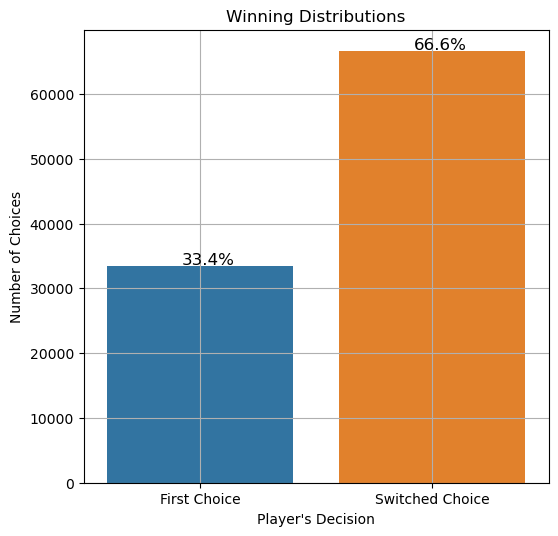

In [4]:
fig = plt.figure(figsize=(6,6),dpi = 100)

label = ['First Choice', 'Switched Choice']
values = [KeepingWins,SwitchingWins]
ax = sns.barplot(x=label,y=values)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/N)
    x = p.get_x() +p.get_width()/2-0.08
    y = p.get_y() +p.get_height()+0.003*N
    ax.annotate(percentage,(x,y),size = 12)
plt.grid()
plt.title('Winning Distributions')
plt.xlabel('Player\'s Decision')
plt.ylabel('Number of Choices')
plt.show()

## N Doors Behavior

The next code runs the game from 3 to 100 Doors and giving the expected probability of winning for each strategy in each number of Doors showing what appears to be an descend exponetial behavior.

In [5]:
SwitchingWins = []
KeepingWins= []

for NDoors in range(3,101):
    door = [x for x in range(1,NDoors+1)]
    N = 100000

    Prize = []
    FirstChoice = []
    RemovedDoor = []
    SwitchingDoors = []


    for i in range(0,N):
        
        #Selectiong witch Door the Prize will be
        Prize.append(random.choice(door))
        FirstChoice.append(random.choice(door))
        
        #Removing the Door with the prize from the pool of Doors to be open
        PoolToRemove = door.copy()
        PoolToRemove.remove(Prize[i])
        if (Prize[i]!=FirstChoice[i]):
            PoolToRemove.remove(FirstChoice[i])
        RemovedDoor.append(random.choice(PoolToRemove))
        
        #Removing a Door from the pool for switching
        PoolToSwitching = door.copy()
        PoolToSwitching.remove(FirstChoice[i])
        PoolToSwitching.remove(RemovedDoor[i])
        SwitchingDoors.append(random.choice(PoolToSwitching))
    
    Prize = np.array(Prize)
    FirstChoice = np.array(FirstChoice)
    SwitchingDoors = np.array(SwitchingDoors)

    SwitchingWins.append(100*(Prize==SwitchingDoors).sum()/N)
    KeepingWins.append(100*(Prize==FirstChoice).sum()/N)
SwitchingWins = np.array(SwitchingWins)
KeepingWins = np.array(KeepingWins)

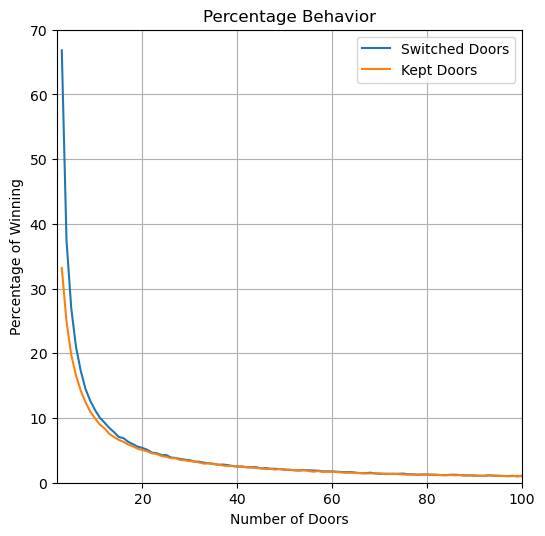

In [6]:

fig = plt.figure(figsize=(6,6), dpi = 100)

Doors = np.array(range(3,101))
sns.lineplot(x = Doors, y = SwitchingWins)
sns.lineplot(x = Doors, y = KeepingWins)
plt.legend(['Switched Doors','Kept Doors'])
plt.title('Percentage Behavior')
plt.xlabel('Number of Doors')
plt.ylabel('Percentage of Winning')
plt.xlim((2,100))
plt.ylim((0,70))
plt.grid()
plt.show()